# Plot Figure 3E

In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import pandas as pd

In [2]:
adata = sc.read('adata_for_velocity_mouse.h5')

In [47]:
celltype_colours = [
"#f9decf",
"#c9a997",
"#C72228",
"#f77b59",
"#EF4E22"]
adata.uns['celltype_colors'] = celltype_colours

Velocities with all genes

In [ ]:
# Preprocessing

In [3]:
scv.pp.filter_and_normalize(adata)

scv.pp.moments(adata, n_neighbors = 50)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:16) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [4]:
# Compute velocities

In [5]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:25:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [7]:
scv.tl.velocity(adata,mode = 'dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:20) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


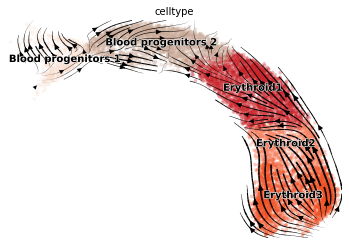

In [8]:
# Plot Figure 3E top left corner

scv.pl.velocity_embedding_stream(adata, basis = "umap", color ="celltype", size = 50)

computing latent time using root_cells as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


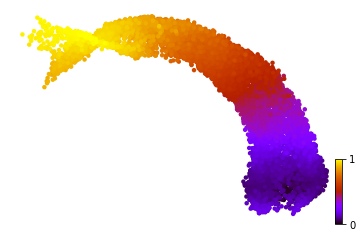

In [10]:
# Plot Figure 3E bottom left corner
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot',size=80, colorbar=True,title = '')

Velocities without MURK genes

In [ ]:
# Preprocessing

In [11]:
adata = sc.read('adata_for_velocity_mouse.h5')

In [20]:
murk_genes = list(pd.read_csv('murk_genes_mouse.csv',header=None)[0])

In [22]:
list_no_murk =[gene for gene in adata.var_names if gene not in murk_genes]

In [23]:
adata = adata[:,list_no_murk].copy()

In [25]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata, n_neighbors = 50)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:03) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [ ]:
# Compute velocities

In [26]:
scv.tl.recover_dynamics(adata)

recovering dynamics
    finished (0:23:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [27]:
scv.tl.velocity(adata,mode = 'dynamical')
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


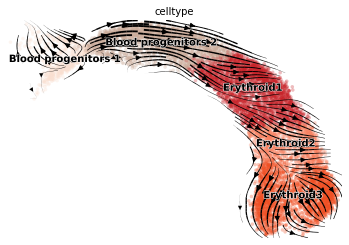

In [28]:
# Plot Figure 3E top right corner

scv.pl.velocity_embedding_stream(adata, basis = "umap", color ="celltype", size = 50)

computing terminal states
    identified 5 regions of root cells and 1 region of end points 
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:03) --> added 
    'latent_time', shared time (adata.obs)


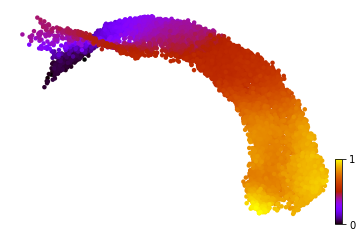

In [29]:
# Plot Figure 3E bottom right corner
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot',size=80, colorbar=True,title = '')